In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt

**Make a simple signal**

In [21]:
N_samples = 512
t = np.linspace(0, 1, N_samples)# duration 1 sec with n_samples
f0 = 10.25
T_sampling = 1 / N_samples
f_sampling = 1 / T_sampling
phi0 = np.pi / 3
x = np.cos( 2 * np.pi * f0 * t + phi0 )

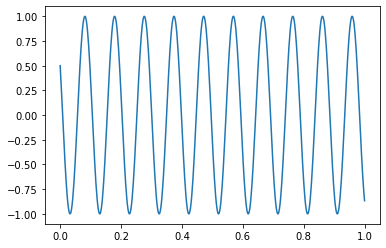

In [22]:
fig, ax = plt.subplots()
ax.plot(t, x)
plt.show()

**Compute FFT, magnitude and phase**

In [29]:
N_fft = 1024# N_samples
f = fftshift(fftfreq(N_fft, d=T_sampling))#range of frequencies
y = fftshift(fft(x, n=N_fft))
y_mag = np.abs(y)
y_phase = np.angle(y)

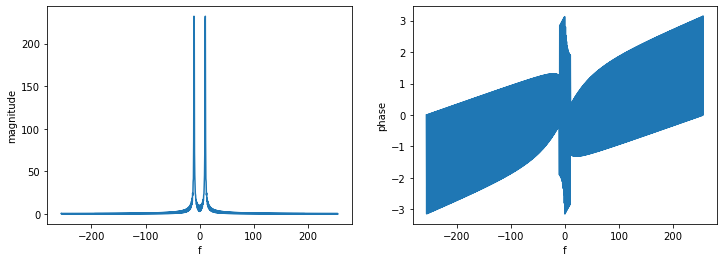

In [30]:
fig, ax = plt.subplots(1,2, figsize=(6*2, 4))
ax[0].plot(f, y_mag)
ax[1].plot(f, y_phase)
ax[0].set_ylabel("magnitude")
ax[0].set_xlabel("f")
ax[1].set_ylabel("phase")
ax[1].set_xlabel("f")
plt.show()

**Retrieved the frequency and phase of the component with highest magnitude**

search on the side of positive frequencies

In [31]:
f_pos = f[N_fft//2:]
max_mag_idx =  np.argmax(y_mag[N_fft//2:])
f0_retrieved = f_pos[max_mag_idx]
phi0_retrieved = y_phase[N_fft//2:][max_mag_idx]
print(f"frequency {f0_retrieved}, phase {phi0_retrieved}")

frequency 10.5, phase 0.3318308134399003


In [33]:
f_sampling / N_fft

0.5

In [27]:
x_retrieved = np.cos( 2 * np.pi * f0_retrieved * t + phi0_retrieved )

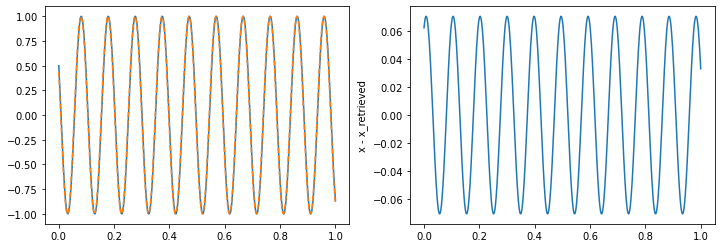

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(t, x)
ax[0].plot(t, x_retrieved, linestyle="--")
ax[1].plot(t, x-x_retrieved)
ax[1].set_ylabel("x - x_retrieved")
plt.show()

reconstruction is not exact because of the limited frequency resolution fs/N